# Klasifikasi Berita menggunakan Fitur Latent Dirichlet Allocation

In [53]:
import pandas as pd
data = pd.read_csv('hasil_preprocessing_berita.csv')

# Tampilkan kolom utama dari file Anda
data[['isi', 'hasil_preprocessing', 'kategori']].head()

,isi,hasil_preprocessing,kategori
0,KOMPAS.com -Pengalaman tak menyenangkan kabarn...,"['kompascom', 'alam', 'senang', 'kabar', 'alam...",Bola
1,"JAKARTA, KOMPAS.com –Tiktokers Figha Lesmana m...","['jakarta', 'kompascom', 'tiktokers', 'figha',...",Megapolitan
2,KOMPAS.com -Wakil Presiden Direktur PT Toyota ...,"['kompascom', 'wakil', 'presiden', 'direktur',...",Money
3,"JAKARTA, KOMPAS.com- Menteri Koordinator Bidan...","['jakarta', 'kompascom', 'menteri', 'koordinat...",Nasional
4,"JAKARTA, KOMPAS.com- Menteri Pertanian (Mentan...","['jakarta', 'kompascom', 'menteri', 'tani', 't...",Nasional


In [54]:
# Gunakan kolom teks bersih Anda
# 'hasil_preprocessing' pada file Anda berisi token hasil preprocessing
# Kita simpan sebagai kolom tunggal untuk analisis

data_text = data[['hasil_preprocessing']]

data_text.head()

,hasil_preprocessing
0,"['kompascom', 'alam', 'senang', 'kabar', 'alam..."
1,"['jakarta', 'kompascom', 'tiktokers', 'figha',..."
2,"['kompascom', 'wakil', 'presiden', 'direktur',..."
3,"['jakarta', 'kompascom', 'menteri', 'koordinat..."
4,"['jakarta', 'kompascom', 'menteri', 'tani', 't..."


In [55]:
data_text['index'] = data_text.index

documents = data_text
documents.head()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_24720\118329293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


,hasil_preprocessing,index
0,"['kompascom', 'alam', 'senang', 'kabar', 'alam...",0
1,"['jakarta', 'kompascom', 'tiktokers', 'figha',...",1
2,"['kompascom', 'wakil', 'presiden', 'direktur',...",2
3,"['jakarta', 'kompascom', 'menteri', 'koordinat...",3
4,"['jakarta', 'kompascom', 'menteri', 'tani', 't...",4


In [56]:
len(documents)

1432

In [57]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [58]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITRO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk 

nltk.download('stopwords')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = stopwords.words('indonesian')

def stemming_indonesia(text):
    return stemmer.stem(text)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(str(text)):  # tokenisasi
        if token not in stop_words and len(token) > 3:
            result.append(stemming_indonesia(token))
    return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import pandas as pd

# Pakai file dan kolom milik Anda
data = pd.read_csv('hasil_preprocessing_berita.csv')
document = data  # alias agar konsisten di cell lain

print("\nTampilan kolom 'isi' dan 'hasil_preprocessing':")
print(document[['isi', 'hasil_preprocessing']].head())

print("\nJumlah data:", document.shape)


Tampilan kolom 'isi' dan 'hasil_preprocessing':
                                                 isi  \
0  KOMPAS.com -Pengalaman tak menyenangkan kabarn...   
1  JAKARTA, KOMPAS.com –Tiktokers Figha Lesmana m...   
2  KOMPAS.com -Wakil Presiden Direktur PT Toyota ...   
3  JAKARTA, KOMPAS.com- Menteri Koordinator Bidan...   
4  JAKARTA, KOMPAS.com- Menteri Pertanian (Mentan...   

                                 hasil_preprocessing  
0  ['kompascom', 'alam', 'senang', 'kabar', 'alam...  
1  ['jakarta', 'kompascom', 'tiktokers', 'figha',...  
2  ['kompascom', 'wakil', 'presiden', 'direktur',...  
3  ['jakarta', 'kompascom', 'menteri', 'koordinat...  
4  ['jakarta', 'kompascom', 'menteri', 'tani', 't...  

Jumlah data: (1432, 3)


In [61]:
import ast

def to_tokens(text: str):
    # Jika sudah list, kembalikan langsung
    if isinstance(text, list):
        return [t for t in text if t]
    # Jika string: coba parse list-string, kalau gagal split spasi
    s = str(text).strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, list):
                return [str(t).strip("'\"") for t in parsed if str(t).strip("'\"")]
        except Exception:
            pass
    return [t for t in s.split() if t]

In [62]:
document_num = 500

if document_num < len(document):
    doc_raw = document.iloc[document_num]['isi']
    doc_tokens = document.iloc[document_num]['hasil_preprocessing']

    print("\nOriginal document (isi):")
    print(doc_raw)

    print("\nHasil preprocessing (hasil_preprocessing):")
    print(doc_tokens)

    # Token array dari hasil_preprocessing (list-string -> list token)
    words = to_tokens(str(doc_tokens))
    print("\nTokenized words:")
    print(words)
else:
    print(f"\n⚠️ Nomor {document_num} melebihi jumlah baris ({len(document)})")


Original document (isi):
KOMPAS.com -Bek Deportivo Alaves, Facundo Garces, tengah menjadi sorotan usai pengakuannya soal asal-usul darah Malaysia yang memicu kontroversi. Facundo Garces merupakan salah satu rekrutan naturalisasi Timnas Malaysia yang diresmikan pada Juni 2025. Dalam wawancara dengan media Spanyol El Correo pada Agustus lalu, Facundo Garces tanpa sengaja menyebut bahwa darah Malaysia-nya hanya berasal dari buyut. “Karena kakek buyut saya (keturunan Malaysia). Saya memang sudah tahu asal-usulnya, tapi saya tidak pernah membayangkan hal ini bisa terjadi," ucap Facundo Garces dikutip dariNST. "Malaysia sedang membangun proyek menarik dan saya sangat bersemangat,” lanjutnya. Baca juga:Reaksi Netizen Usai 7 Pemain Timnas Malaysia Diskors 1 Tahun oleh FIFA Garces sudah sempat tampil bersama Timnas Malaysia. Ia bermain penuh 90 menit saat Harimau Malaya menang telak 4-0 atas Vietnam pada laga Kualifikasi Piala Asia 2027, 10 Juni 2025. Facundo Garces termasuk dalam gelombang na

In [63]:
print(document.columns.tolist())

['isi', 'hasil_preprocessing', 'kategori']


In [64]:
# Helper untuk mengubah kolom 'hasil_preprocessing' menjadi list token
# Menangani format list-string seperti "['kata1', 'kata2', ...]" atau string biasa terpisah spasi
import ast

def to_tokens(text: str):
    if isinstance(text, list):
        return [t for t in text if t]
    if isinstance(text, str):
        s = text.strip()
        # Coba parse sebagai list literal
        if s.startswith('[') and s.endswith(']'):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    return [str(t).strip("'\"") for t in parsed if str(t).strip("'\"")]
            except Exception:
                pass
        # Fallback: split spasi
        return [t for t in s.split() if t]
    return []

# Tampilkan contoh token hasil konversi
sample_idx = 0
print(to_tokens(str(data.iloc[sample_idx]['hasil_preprocessing']))[:20])


['kompascom', 'alam', 'senang', 'kabar', 'alami', 'keluarga', 'timnas', 'indonesia', 'hadir', 'langsung', 'king', 'abdullah', 'sports', 'city', 'jeddah', 'saksi', 'juang', 'skuad', 'garuda', 'lawan']


In [65]:
process_docs = document['isi'].map(preprocess)

In [66]:
process_docs[:10]

0    [kompas, alam, senang, kabar, alami, keluarga,...
1    [jakarta, kompas, tiktokers, figha, lesmana, m...
2    [kompas, wakil, presiden, direktur, toyota, mo...
3    [jakarta, kompas, menteri, koordinator, bidang...
4    [jakarta, kompas, menteri, tani, tan, andi, am...
5    [kompas, harap, timnas, indonesia, lang, ajang...
6    [timnasindonesia, kalah, arab, saudi, mimpi, l...
7    [jakarta, kompas, sepatu, bata, bata, resmi, h...
8    [semarang, kompas, masalah, akses, jalan, jala...
9    [ringkas, berita, jakarta, kompas, huawei, res...
Name: isi, dtype: object

**Get a BOW Dict from data**

In [67]:
dic = gensim.corpora.Dictionary(process_docs)
count = 0
for k, v in dic.items():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abdullah
1 akibat
2 akses
3 aktif
4 aku
5 alam
6 alami
7 aman
8 arab
9 arah
10 asia


**filter the dict**

In [68]:
dic.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

**Convert document into BOW format by doc2bow**

In [69]:
bow_corpus = [dic.doc2bow(doc) for doc in process_docs]

In [70]:
dictionary = dic 

document_num = 34

bow_doc = bow_corpus[document_num]

if len(bow_doc) == 0:
    print(f"Dokumen ke-{document_num} kosong.")
else:
    print(f"=== Isi dokumen ke-{document_num} ===\n")
    for word_id, freq in bow_doc:
        print(f"Word ID {word_id} (\"{dictionary[word_id]}\") appears {freq} time(s).")

=== Isi dokumen ke-34 ===

Word ID 11 ("duel") appears 2 time(s).
Word ID 17 ("fisik") appears 1 time(s).
Word ID 23 ("haye") appears 5 time(s).
Word ID 40 ("kontra") appears 1 time(s).
Word ID 50 ("patrick") appears 1 time(s).
Word ID 62 ("skor") appears 2 time(s).
Word ID 67 ("thom") appears 5 time(s).
Word ID 73 ("unggul") appears 1 time(s).
Word ID 146 ("iring") appears 1 time(s).
Word ID 172 ("adil") appears 6 time(s).
Word ID 236 ("kalah") appears 2 time(s).
Word ID 238 ("klasemen") appears 1 time(s).
Word ID 255 ("tentu") appears 1 time(s).
Word ID 262 ("coba") appears 1 time(s).
Word ID 279 ("menit") appears 3 time(s).
Word ID 383 ("khas") appears 1 time(s).
Word ID 499 ("gelora") appears 7 time(s).
Word ID 507 ("performa") appears 1 time(s).
Word ID 540 ("aksi") appears 1 time(s).
Word ID 606 ("percaya") appears 1 time(s).
Word ID 696 ("kesan") appears 1 time(s).
Word ID 801 ("sang") appears 1 time(s).
Word ID 820 ("buah") appears 1 time(s).
Word ID 845 ("super") appears 5 tim

**TF-IDF on our document set**

In [71]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [72]:
corpus_tfidf = tfidf[bow_corpus]

In [73]:
for docu in corpus_tfidf:
    print(docu)
    break

[(0, 0.12366905134426494), (1, 0.12038705724869228), (2, 0.06734218215630335), (3, 0.05033074409123361), (4, 0.3039630929564891), (5, 0.049686501396689196), (6, 0.0677165195286065), (7, 0.050827385161633584), (8, 0.08249797088169694), (9, 0.11883841871278311), (10, 0.09336853587779005), (11, 0.13045526036963473), (12, 0.08494493253803109), (13, 0.04860502203962517), (14, 0.04860502203962517), (15, 0.0840968489853405), (16, 0.06270633871007857), (17, 0.0677165195286065), (18, 0.05389073955064432), (19, 0.050827385161633584), (20, 0.05891857881654438), (21, 0.05795211795164751), (22, 0.09210904953336134), (23, 0.08494493253803109), (24, 0.07595211106861889), (25, 0.1019912120332652), (26, 0.07652132919827212), (27, 0.12661711897398759), (28, 0.07142887040256793), (29, 0.05748524072886358), (30, 0.08873269243156527), (31, 0.12541267742015713), (32, 0.11833477225334256), (33, 0.18299348666953855), (34, 0.06522763018481736), (35, 0.08771906886291192), (36, 0.1938200808707996), (37, 0.048756

**Running LDA using Bag of Words data**

In [74]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dic, passes = 2, workers=2)

In [75]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.028*"israel" + 0.016*"gaza" + 0.010*"perang" + 0.010*"hamas" + 0.009*"trump" + 0.007*"palestina" + 0.006*"pasar" + 0.006*"senjata" + 0.006*"tewas" + 0.005*"bakar"


Topic: 1 
Words: 0.026*"emas" + 0.013*"gram" + 0.011*"tiktok" + 0.009*"guna" + 0.008*"aplikasi" + 0.008*"antam" + 0.008*"jual" + 0.008*"prabowo" + 0.007*"gadai" + 0.006*"sppg"


Topic: 2 
Words: 0.009*"produk" + 0.008*"kelola" + 0.008*"undang" + 0.007*"pasal" + 0.006*"energi" + 0.005*"beli" + 0.005*"listrik" + 0.005*"ikan" + 0.005*"gaji" + 0.004*"prabowo"


Topic: 3 
Words: 0.025*"arab" + 0.024*"saudi" + 0.012*"kluivert" + 0.009*"irak" + 0.008*"persib" + 0.008*"patrick" + 0.008*"united" + 0.007*"menit" + 0.007*"ledak" + 0.006*"gedung"


Topic: 4 
Words: 0.015*"anggar" + 0.012*"siswa" + 0.012*"dana" + 0.009*"sekolah" + 0.009*"purbaya" + 0.008*"sangka" + 0.008*"motogp" + 0.006*"racun" + 0.006*"korupsi" + 0.006*"gubernur"


Topic: 5 
Words: 0.007*"film" + 0.007*"mobil" + 0.006*"mati" + 0.006*"pidana" + 0.006

**Topic coherence**

In [76]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=process_docs, dictionary=dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4233124490272225


In [77]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=process_docs, dictionary=dic, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -7.164994028530875


**find the optimal number of topics**

In [78]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dic, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dic, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [79]:
model_list, coherence_values = compute_coherence_values(dictionary=dic, corpus=bow_corpus, texts=process_docs, start=2, limit=40, step=6)

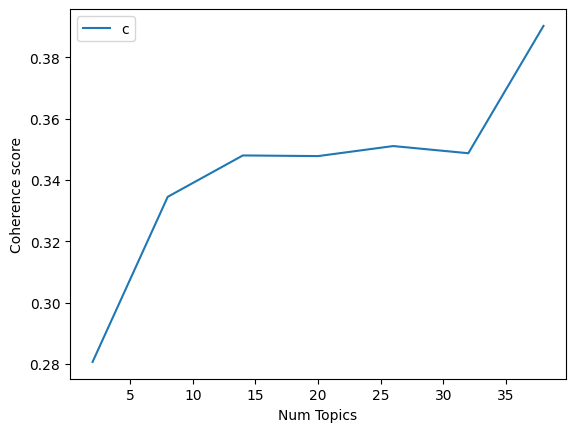

In [80]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**Running LDA using TF-IDF**

In [81]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word = dic, passes = 2, workers=4)

In [82]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.008*"pesantren" + 0.008*"ponpes" + 0.006*"khoziny" + 0.005*"tarif" + 0.004*"sidoarjo" + 0.004*"tragedi" + 0.004*"pondok" + 0.004*"diskon" + 0.003*"sangka" + 0.003*"ambruk"


Topic: 1 Word: 0.006*"lampung" + 0.004*"ukraina" + 0.003*"sekolah" + 0.003*"kamera" + 0.003*"hotel" + 0.003*"layar" + 0.003*"ponsel" + 0.003*"mobil" + 0.003*"busuk" + 0.003*"mayat"


Topic: 2 Word: 0.007*"menit" + 0.007*"liga" + 0.006*"saudi" + 0.006*"arab" + 0.005*"barcelona" + 0.005*"penalti" + 0.005*"nikita" + 0.004*"babi" + 0.004*"klub" + 0.004*"kalah"


Topic: 3 Word: 0.005*"sangka" + 0.005*"purbaya" + 0.005*"narkoba" + 0.005*"undang" + 0.005*"kilang" + 0.005*"ammar" + 0.004*"anggar" + 0.004*"pesawat" + 0.004*"gubernur" + 0.004*"zoni"


Topic: 4 Word: 0.015*"emas" + 0.009*"gram" + 0.007*"gadai" + 0.006*"antam" + 0.006*"galeri" + 0.005*"jembatan" + 0.005*"nikita" + 0.004*"bal" + 0.004*"anggar" + 0.004*"jual"


Topic: 5 Word: 0.006*"israel" + 0.005*"energi" + 0.004*"baterai" + 0.004*"listrik" + 

In [83]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=process_docs, dictionary=dic, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.36423338594410903


**classifying sample document using LDA Bag of Words model**

In [84]:
process_docs[document_num]

['bandung',
 'kompas',
 'persib',
 'bandung',
 'turun',
 'main',
 'debut',
 'bintang',
 'timnas',
 'indonesia',
 'thom',
 'haye',
 'eliano',
 'reijnders',
 'laga',
 'kontra',
 'baya',
 'debut',
 'main',
 'anyar',
 'hasil',
 'buah',
 'menang',
 'persib',
 'baya',
 'surabaya',
 'pekan',
 'super',
 'league',
 'hasil',
 'persib',
 'bandung',
 'baya',
 'sudah',
 'skor',
 'persib',
 'menang',
 'uilliam',
 'barros',
 'menit',
 'laga',
 'gelar',
 'jumat',
 'stadion',
 'gelora',
 'bandung',
 'laut',
 'gbla',
 'thom',
 'haye',
 'eliano',
 'reijnders',
 'jalan',
 'debut',
 'kesan',
 'persib',
 'main',
 'federico',
 'barba',
 'andrew',
 'jung',
 'baca',
 'hasil',
 'persib',
 'bandung',
 'baya',
 'uilliam',
 'tentu',
 'laga',
 'kompas',
 'adil',
 'persib',
 'bandung',
 'baya',
 'surabaya',
 'debut',
 'federico',
 'barba',
 'starter',
 'jumat',
 'gelora',
 'bandung',
 'laut',
 'gbla',
 'barba',
 'como',
 'tampil',
 'menit',
 'hodak',
 'ragu',
 'percaya',
 'tahan',
 'iring',
 'kondisi',
 'bugar',
 's

In [85]:
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.9932317137718201	 Topic: 0.025*"arab" + 0.024*"saudi" + 0.012*"kluivert" + 0.009*"irak" + 0.008*"persib"


In [86]:
lda_model[bow_corpus[document_num]]

[(3, 0.9932317)]

In [87]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(3, 0.9932317)]

In [88]:
lda_model.print_topic(index, 10)

'0.025*"arab" + 0.024*"saudi" + 0.012*"kluivert" + 0.009*"irak" + 0.008*"persib" + 0.008*"patrick" + 0.008*"united" + 0.007*"menit" + 0.007*"ledak" + 0.006*"gedung"'

**classifying sample document using LDA TF-IDF model**

In [89]:
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))


Score: 0.6182703971862793	 Topic: 0.010*"saudi" + 0.009*"arab" + 0.007*"balap" + 0.007*"motogp" + 0.006*"marquez"

Score: 0.3272719383239746	 Topic: 0.006*"persib" + 0.005*"bangkok" + 0.005*"united" + 0.004*"lagu" + 0.004*"prabowo"

Score: 0.04919148609042168	 Topic: 0.007*"menit" + 0.007*"liga" + 0.006*"saudi" + 0.006*"arab" + 0.005*"barcelona"


**Testing model on unseen document**

In [90]:
# Test dengan dokumen yang lebih panjang dan relevan
unseen_document = "Jakarta, Kompas.com - Presiden Indonesia mengumumkan kebijakan baru terkait ekonomi. Menteri keuangan menjelaskan bahwa inflasi akan turun dalam beberapa bulan ke depan."

print("Dokumen yang akan dites:")
print(unseen_document)
print("\nHasil preprocessing:")
preprocessed = preprocess(unseen_document)
print(preprocessed)

bow_vector = dic.doc2bow(preprocessed)
print(f"\nBow vector: {bow_vector}")

if len(bow_vector) == 0:
    print("\n⚠️ PERINGATAN: Tidak ada kata yang ditemukan dalam dictionary!")
    print("Kemungkinan kata-kata dalam dokumen tidak ada dalam data training.")
else:
    print("\nHasil klasifikasi LDA:")
    for index, score in sorted(lda_model[bow_vector], key = lambda tup : tup[1], reverse=True):
        print('Score: {:.4f}\t Topik {}'.format(score, lda_model.print_topic(index, 5)))

Dokumen yang akan dites:
Jakarta, Kompas.com - Presiden Indonesia mengumumkan kebijakan baru terkait ekonomi. Menteri keuangan menjelaskan bahwa inflasi akan turun dalam beberapa bulan ke depan.

Hasil preprocessing:
['jakarta', 'kompas', 'presiden', 'indonesia', 'umum', 'bijak', 'kait', 'ekonomi', 'menteri', 'uang', 'inflasi', 'turun']

Bow vector: [(136, 1), (204, 1), (775, 1)]

Hasil klasifikasi LDA:
Score: 0.7749	 Topik 0.028*"israel" + 0.016*"gaza" + 0.010*"perang" + 0.010*"hamas" + 0.009*"trump"
Score: 0.0250	 Topik 0.015*"balap" + 0.010*"honda" + 0.010*"kendara" + 0.009*"motogp" + 0.008*"produksi"
Score: 0.0250	 Topik 0.009*"produk" + 0.008*"kelola" + 0.008*"undang" + 0.007*"pasal" + 0.006*"energi"
Score: 0.0250	 Topik 0.015*"anggar" + 0.012*"siswa" + 0.012*"dana" + 0.009*"sekolah" + 0.009*"purbaya"
Score: 0.0250	 Topik 0.026*"emas" + 0.013*"gram" + 0.011*"tiktok" + 0.009*"guna" + 0.008*"aplikasi"
Score: 0.0250	 Topik 0.010*"malaysia" + 0.008*"fifa" + 0.006*"partai" + 0.006*"mob